In [1]:
import pandas as pd
from statsmodels.stats import proportion
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms
import numpy as np

In [6]:
# calculate all error intervals
resultsfolder = "Results Nov25"
resultgroup = "combined copied" # "all"/"litneg"/"human"
interval_type = "bootstrap" # "binom"/"bootstrap"
n_bootstraps = 20000

#errorsdf = pd.read_excel(resultsfolder+"/test_model_{}_summary.xlsx".format(resultgroup), sheet_name="counts for errors")
#errorsdf = pd.read_excel(resultsfolder+"/Nov25_{}_counts-for-errors.xlsx".format(resultgroup))
errorsdf = pd.read_excel(resultsfolder+"/Nov25_counts-for-errors_combined copied.xlsx")

columns_interval = 5
label_columns = 3
for i in range(int((len(errorsdf.columns)-label_columns)/columns_interval)):
    print(i)
    for row in range(len(errorsdf)):
        Ncorrect = errorsdf.iat[row,2+label_columns+columns_interval*i]
        Ntotal = errorsdf.iat[row,1+label_columns+columns_interval*i]
        if errorsdf.iat[row,1] == True:
            interval_type = "bootstrap"
        else:
            interval_type = "binom"
        if interval_type == "binom":
            intervals = proportion.proportion_confint(Ncorrect, Ntotal, alpha=0.05, method='binom_test')
        elif interval_type == "bootstrap":
            yarray = np.array([1]*Ncorrect+[0]*(Ntotal-Ncorrect))
            accuracies1 = []
            for b in range(n_bootstraps):
                inds = np.random.choice(len(yarray), size=len(yarray), replace=True)
                y_i = yarray[inds]        
                accuracies1.append(np.mean(y_i))
            intervals = (np.percentile(accuracies1,[2.5])[0],np.percentile(accuracies1,[97.5])[0])
        errorsdf.iat[row,3+label_columns+columns_interval*i] = intervals[0]
        errorsdf.iat[row,4+label_columns+columns_interval*i] = intervals[1]
                         
errorsdf.to_csv(resultsfolder+"/results with errors output totals {}.csv".format(resultgroup), index = False)

0
1


C:\Users\jo16726\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\stats\proportion.py:190: RuntimeWarning: invalid value encountered in divide
  q_ = count_a / nobs_a
C:\Users\jo16726\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\jo16726\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17


In [7]:
# Select which models include in plots
outputfolder = "plotsNov25/remove old models and cf"

modelgroup = "qtest" # "m"/"Mnew"/"q"/"qtest"/"totals"/"totalsM"/"totalsMlitneg"

dpi = 180
#resultstb = pd.read_csv("Results all Nov24/results with errors output totals all.csv")
#resultstb_litneg = pd.read_csv("Results all Nov24/results with errors output totals litneg.csv")
#resultstb_M = pd.read_csv("Results Nov25/results with errors output totals all.csv")
#resultstb_M_litneg = pd.read_csv("Results Nov25/results with errors output totals litneg.csv")
#resultstb_test = pd.read_csv("Results Nov25/results with errors output totals test.csv")
resultstb_comb = pd.read_csv("Results Nov25/results with errors output totals combined copied.csv")

# ([model names in results file],[model names to display])
models_m =        (["glove add_lem",
                    "sbert2_long",
                    "GPT-Neo-1.3B m2",
                    "Llama2-7B m2",
                    "Llama2-13B m2",
                    "Llama2-70B m2",
                    "Llama2-7B-chat m2",
                    "Llama2-13B-chat m2",
                    "Llama-3-70B-Instruct-Turbo m2",
                    "Llama-3.1-70B-Instruct-Turbo m2",
                    "Llama-3.1-405B-Instruct-Turbo m2",
                    "Llama-3.3-70B-Instruct-Turbo m2"
                   ],
                   ["GloVe",
                    "SBERT",
                    "GPT-Neo-1.3B",
                    "Llama-2-7B",
                    "Llama-2-13B",
                    "Llama-2-70B",
                    "Llama-2-7B-chat",
                    "Llama-2-13B-chat",
                    "Llama-3-70B-Instruct",
                    "Llama-3.1-70B-Instruct",
                    "Llama-3.1-405B-Instruct",
                    "Llama-3.3-70B-Instruct"
                   ])

models_m_litneg = (["glove add_lem litneg",
                    "sbert2_long litneg",
                    "GPT-Neo-1.3B m2 litneg",
                    "Llama2-7B m2 litneg",
                    "Llama2-13B m2 litneg",
                    "Llama2-70B m2 litneg",
                    "Llama2-7B-chat m2 litneg",
                    "Llama2-13B-chat m2 litneg",
                    "Llama-3-70B-Instruct-Turbo m2 litneg",
                    "Llama-3.1-70B-Instruct-Turbo m2 litneg",
                    "Llama-3.1-405B-Instruct-Turbo m2 litneg",
                    "Llama-3.3-70B-Instruct-Turbo m2 litneg"
                   ],
                   ["GloVe",
                    "SBERT",
                    "GPT-Neo-1.3B",
                    "Llama-2-7B",
                    "Llama-2-13B",
                    "Llama-2-70B",
                    "Llama-2-7B-chat",
                    "Llama-2-13B-chat",
                    "Llama-3-70B-Instruct",
                    "Llama-3.1-70B-Instruct",
                    "Llama-3.1-405B-Instruct",
                    "Llama-3.3-70B-Instruct"
                   ])

models_q =        ([#"Llama2-70B mixedprompt",
                    #"Llama2-13B-chat mixedprompt",
                    "Llama-3.1-70B-Instruct-Turbo mixedprompt",
                    "Llama-3.1-405B-Instruct-Turbo mixedprompt",
                    "Llama-3.3-70B-Instruct-Turbo mixedprompt",
                    "GPT-4o-mini mixedprompt",
                    "GPT-4o mixedprompt",
                    "o1-mini mixedprompt",
                   ],
                   [#"Llama-2-70B",
                    #"Llama-2-13B-chat",
                    "Llama-3.1-70B-Instruct",
                    "Llama-3.1-405B-Instruct",
                    "Llama-3.3-70B-Instruct",
                    "GPT-4o-mini",
                    "GPT-4o",
                    "o1-mini",
                   ])

models_q_litneg = ([#"Llama2-70B mixedprompt litneg",
                    #"Llama2-13B-chat mixedprompt litneg",
                    "Llama-3.1-70B-Instruct-Turbo mixedprompt litneg",
                    "Llama-3.1-405B-Instruct-Turbo mixedprompt litneg",
                    "Llama-3.3-70B-Instruct-Turbo mixedprompt litneg",
                    "GPT-4o-mini mixedprompt litneg",
                    "GPT-4o mixedprompt litneg",
                    "o1-mini mixedprompt litneg"
                   ],
                   [#"Llama2-70B",
                    #"Llama-2-13B-chat",
                    "Llama-3.1-70B-Instruct",
                    "Llama-3.1-405B-Instruct",
                    "Llama-3.3-70B-Instruct",
                    "GPT-4o-mini",
                    "GPT-4o",
                    "o1-mini"
                   ])

models_q_test = ([
                    "Llama-3.1-70B-Instruct Q test",
                    "Llama-3.1-405B-Instruct Q test",
                    "Llama-3.3-70B-Instruct Q test",
                    "gpt-4o-mini Q test",
                    "gpt-4o Q test",
                    "human"
                   ],
                   ["Llama-3.1-70B-Instruct",
                    "Llama-3.1-405B-Instruct",
                    "Llama-3.3-70B-Instruct",
                    "GPT-4o-mini",
                    "GPT-4o",
                    "Human"
                   ])

models_M =        (["glove add_lem",
                    "sbert2_long",
                    #"GPT-Neo-1.3B m2",
                    #"Llama2-7B m2",
                    #"Llama2-13B m2",
                    #"Llama2-70B m2",
                    #"Llama2-7B-chat m2",
                    #"Llama2-13B-chat m2",
                    "Llama-3-70B-Instruct M123",
                    #"Llama-3-70B-Instruct M45",
                    "Llama-3.1-70B-Instruct M123",
                    #"Llama-3.1-70B-Instruct M45",
                    "Llama-3.1-405B-Instruct M123",
                    #"Llama-3.1-405B-Instruct M45",
                    "Llama-3.3-70B-Instruct M123",
                    #"Llama-3.3-70B-Instruct M45"
                   ],
                   ["GloVe",
                    "SBERT",
                    #"GPT-Neo-1.3B",
                    #"Llama-2-7B",
                    #"Llama-2-13B",
                    #"Llama-2-70B",
                    #"Llama-2-7B-chat",
                    #"Llama-2-13B-chat",
                    "Llama-3-70B-Instruct",
                    #"Llama-3-70B-Instruct cf",
                    "Llama-3.1-70B-Instruct",
                    #"Llama-3.1-70B-Instruct cf",
                    "Llama-3.1-405B-Instruct",
                    #"Llama-3.1-405B-Instruct cf",
                    "Llama-3.3-70B-Instruct",
                    #"Llama-3.3-70B-Instruct cf"
                   ])

models_M_litneg = (["glove add_lem litneg",
                    "sbert2_long litneg",
                    #"GPT-Neo-1.3B m2 litneg",
                    #"Llama2-7B m2 litneg",
                    #"Llama2-13B m2 litneg",
                    #"Llama2-70B m2 litneg",
                    #"Llama2-7B-chat m2 litneg",
                    #"Llama2-13B-chat m2 litneg",
                    "Llama-3-70B-Instruct M123 litneg",
                    #"Llama-3-70B-Instruct M45 litneg",
                    "Llama-3.1-70B-Instruct M123 litneg",
                    #"Llama-3.1-70B-Instruct M45 litneg",
                    "Llama-3.1-405B-Instruct M123 litneg",
                    #"Llama-3.1-405B-Instruct M45 litneg",
                    "Llama-3.3-70B-Instruct M123 litneg",
                    #"Llama-3.3-70B-Instruct M45 litneg"
                   ],
                   ["GloVe",
                    "SBERT",
                    #"GPT-Neo-1.3B",
                    #"Llama-2-7B",
                    #"Llama-2-13B",
                    #"Llama-2-70B",
                    #"Llama-2-7B-chat",
                    #"Llama-2-13B-chat",
                    "Llama-3-70B-Instruct",
                    #"Llama-3-70B-Instruct cf",
                    "Llama-3.1-70B-Instruct",
                    #"Llama-3.1-70B-Instruct cf",
                    "Llama-3.1-405B-Instruct",
                    #"Llama-3.1-405B-Instruct cf",
                    "Llama-3.3-70B-Instruct",
                    #"Llama-3.3-70B-Instruct cf"
                   ])

models_totals =   (["glove add_lem",
                    "sbert2_long",
                    "GPT-Neo-1.3B m2",
                    "Total m2",
                    "Total q",
                    "human"
                   ],
                   ["GloVe",
                    "SBERT",
                    "GPT-Neo-1.3B",
                    "Mid-Phrase",
                    "Question-Answer",
                    "Human"
                   ])

models_totals_litneg = (["glove add_lem litneg",
                    "sbert2_long litneg",
                    "GPT-Neo-1.3B m2 litneg",
                    "Total m2 litneg",
                    "Total q litneg"
                   ],
                   ["GloVe",
                    "SBERT",
                    "GPT-Neo-1.3B",
                    "Mid-Phrase",
                    "Question-Answer"
                   ])

models_totals_M = (["glove add_lem",
                    "sbert2_long",
                    #"GPT-Neo-1.3B m2",
                    "Total M123",
                    #"Total M45",
                    "Total q",
                    "Total Q test",
                    "human"
                   ],
                   ["GloVe",
                    "SBERT",
                    #"GPT-Neo-1.3B",
                    "Mid-Phrase c",
                    #"Mid-Phrase cf",
                    "Question-Answer train",
                    "Question-Answer test",
                    "Human"
                   ])


models_totals_M_litneg = (["glove add_lem litneg",
                    "sbert2_long litneg",
                    #"GPT-Neo-1.3B m2 litneg",
                    "Total M123 litneg",
                    #"Total M45 litneg",
                    "Total q litneg",
                   ],
                   ["GloVe",
                    "SBERT",
                    #"GPT-Neo-1.3B",
                    "Mid-Phrase",
                    #"Mid-Phrase cf",
                    "Question-Answer",
                   ])

models_totals_M_reduced = (["glove add_lem",
                    "sbert2_long",
                    #"GPT-Neo-1.3B m2 litneg",
                    "Total M123",
                    #"Total M45 litneg",
                    "Total q",
                   ],
                   ["GloVe",
                    "SBERT",
                    #"GPT-Neo-1.3B",
                    "Mid-Phrase",
                    #"Mid-Phrase cf",
                    "Question-Answer",
                   ])

#resultstb_m = resultstb[resultstb["model"].isin(models_m[0])]=
#resultstb_q = resultstb[resultstb["model"].isin(models_q[0])]
#resultstb_litneg_m = resultstb_litneg[resultstb_litneg["model"].isin(models_m[0])]
#resultstb_litneg_q = resultstb_litneg[resultstb_litneg["model"].isin(models_q[0])]


if modelgroup == "m":
    models = models_m
    models_litneg = models_m_litneg
    include_human = False
    
elif modelgroup == "Mnew":
    models = models_M
    models_litneg = models_M_litneg
    include_human = False

elif modelgroup == "q":
    models = models_q
    models_litneg = models_q_litneg
    include_human = False
    
elif modelgroup == "qtest":
    models = models_q_test
    models_litneg = models_q_litneg
    include_human = True
    
elif modelgroup == "totals":
    models = models_totals
    models_litneg = models_q_litneg
    include_human = True
    
elif modelgroup == "totalsM":
    models = models_totals_M
    models_litneg = models_totals_M_litneg
    include_human = True
    
elif modelgroup == "totalsMlitneg":
    models = models_totals_M_reduced
    models_litneg = models_totals_M_litneg
    include_human = False
    
resultstb = resultstb_comb.set_index("model").loc[models[0]].reset_index()
resultstb_litneg = resultstb_comb.set_index("model").loc[models_litneg[0]].reset_index()


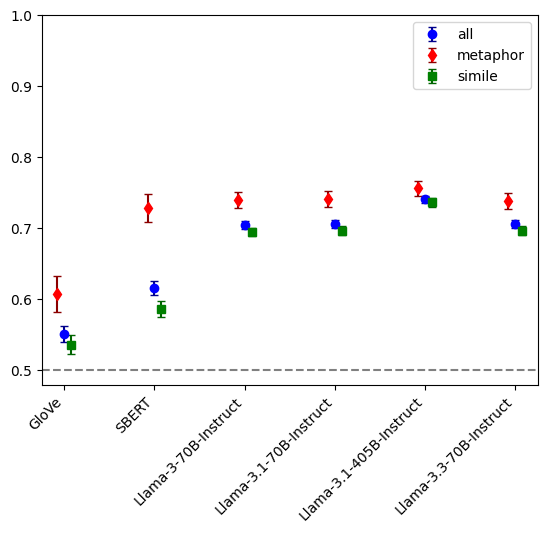

In [64]:
outputfilename = outputfolder+'/overall-{}'.format(modelgroup)

fig = plt.figure()
x = models[1]
yall = resultstb['all average']
ymet = resultstb['met average']
ysim = resultstb['sim average']

err_lower = yall - resultstb['all lower interval']
err_upper = resultstb['all upper interval'] - yall
yerrall = [err_lower, err_upper]

err_lower = ymet - resultstb['met lower interval']
err_upper = resultstb['met upper interval'] - ymet
yerrmet = [err_lower, err_upper]

err_lower = ysim - resultstb['sim lower interval']
err_upper = resultstb['sim upper interval'] - ysim
yerrsim = [err_lower, err_upper]


offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData

plt.errorbar(x, yall, yerrall, capsize=3, fmt="bo", ecolor = "darkblue", label="all")
plt.errorbar(x, ymet, yerrmet, capsize=3, fmt="rd", ecolor = "darkred", label="metaphor", transform=trans+offset(-5))
plt.errorbar(x, ysim, yerrsim, capsize=3, fmt="gs", ecolor = "darkgreen",label="simile", transform=trans+offset(5))
plt.axhline(y=0.5, color='grey', linestyle='--')
plt.xticks(rotation=45, ha='right')
plt.ylim((0.48, 1))
plt.legend()
plt.show
plt.savefig('{}.png'.format(outputfilename), bbox_inches='tight', dpi=dpi)

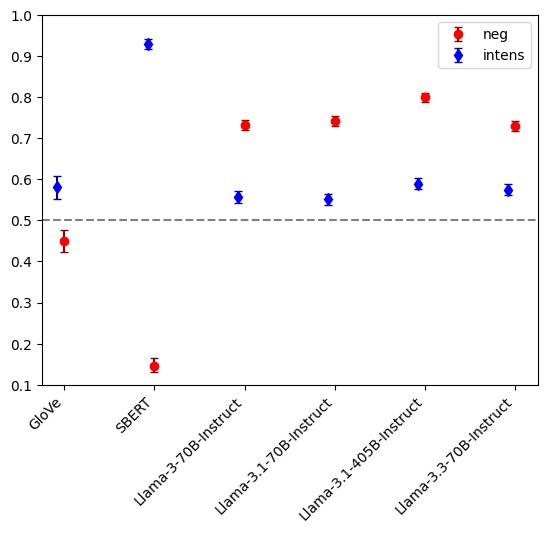

In [65]:
outputfilename = outputfolder+'/neg_intens-{}'.format(modelgroup)

fig = plt.figure()
x = models[1]
y1 = resultstb['neg average']
y2 = resultstb['intens average']
ynames = ('neg','intens')
ylabels = ('neg','intens')

err_lower = y1 - resultstb['{} lower interval'.format(ynames[0])]
err_upper = resultstb['{} upper interval'.format(ynames[0])] - y1
yerr1 = [err_lower, err_upper]

err_lower = y2 - resultstb['{} lower interval'.format(ynames[1])]
err_upper = resultstb['{} upper interval'.format(ynames[1])] - y2
yerr2 = [err_lower, err_upper]


offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData

plt.errorbar(x, y1, yerr1, capsize=3, fmt="ro", ecolor = "darkred", label=ylabels[0])
plt.errorbar(x, y2, yerr2, capsize=3, fmt="bd", ecolor = "darkblue", label=ylabels[1], transform=trans+offset(-5))
plt.axhline(y=0.5, color='grey', linestyle='--')
plt.xticks(rotation=45, ha='right')
plt.ylim((0.1, 1))
plt.legend()
plt.show
plt.savefig('{}.png'.format(outputfilename), bbox_inches='tight', dpi=dpi)

C:\Users\jo16726\AppData\Local\Temp\ipykernel_25280\3649303716.py:34: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "gs" (-> marker='s'). The keyword argument will take precedence.
  plt.errorbar(x, y4, yerr4, capsize=3, fmt="gs", mec = 'orange', mfc ="orange", marker=">", ecolor = "brown",label=ylabels[3], transform=trans+offset(6))


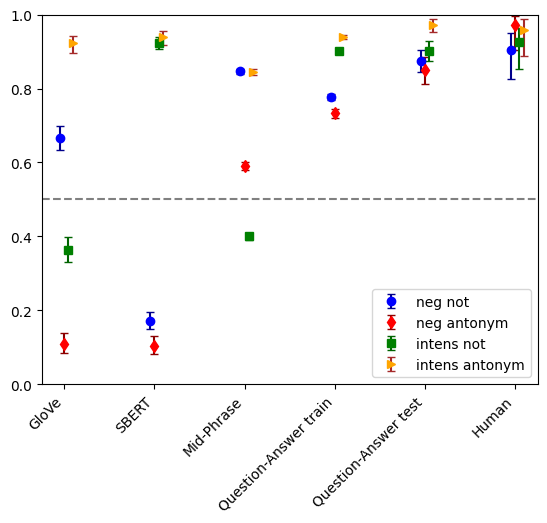

In [72]:
outputfilename = outputfolder+'/neg_splits-{}'.format(modelgroup)

fig = plt.figure()
x = models[1]
y1 = resultstb['neg not average']
y2 = resultstb['neg antonym average']
y3 = resultstb['intens not average']
y4 = resultstb['intens antonym average']
ynames = ('neg not', 'neg antonym', 'intens not', 'intens antonym')
ylabels = ('neg not', 'neg antonym', 'intens not', 'intens antonym')

err_lower = y1 - resultstb['{} lower interval'.format(ynames[0])]
err_upper = resultstb['{} upper interval'.format(ynames[0])] - y1
yerr1 = [err_lower, err_upper]

err_lower = y2 - resultstb['{} lower interval'.format(ynames[1])]
err_upper = resultstb['{} upper interval'.format(ynames[1])] - y2
yerr2 = [err_lower, err_upper]

err_lower = y3 - resultstb['{} lower interval'.format(ynames[2])]
err_upper = resultstb['{} upper interval'.format(ynames[2])] - y3
yerr3 = [err_lower, err_upper]

err_lower = y4 - resultstb['{} lower interval'.format(ynames[3])]
err_upper = resultstb['{} upper interval'.format(ynames[3])] - y4
yerr4 = [err_lower, err_upper]

offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData

plt.errorbar(x, y1, yerr1, capsize=3, fmt="bo", ecolor = "darkblue", label=ylabels[0], transform=trans+offset(-3))
plt.errorbar(x, y2, yerr2, capsize=3, fmt="rd", ecolor = "darkred", label=ylabels[1])
plt.errorbar(x, y3, yerr3, capsize=3, fmt="gs", ecolor = "darkgreen", label=ylabels[2], transform=trans+offset(3))
plt.errorbar(x, y4, yerr4, capsize=3, fmt="gs", mec = 'orange', mfc ="orange", marker=">", ecolor = "brown",label=ylabels[3], transform=trans+offset(6))
plt.axhline(y=0.5, color='grey', linestyle='--')
plt.xticks(rotation=45, ha='right')
plt.ylim((0, 1))
plt.legend()
plt.show
plt.savefig('{}.png'.format(outputfilename), bbox_inches='tight', dpi=dpi)

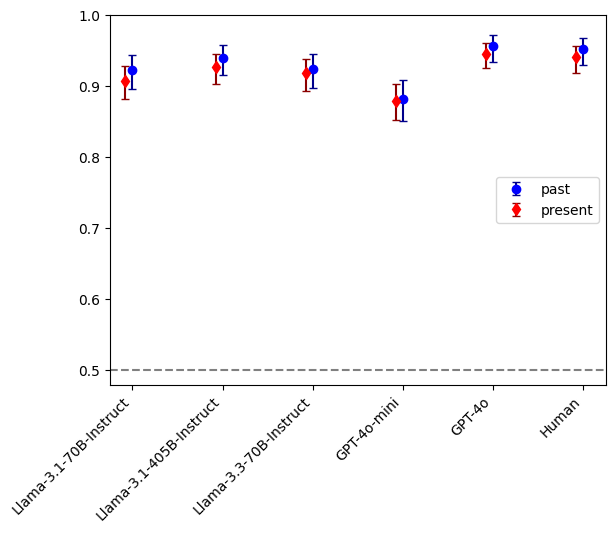

In [4]:
outputfilename = outputfolder+'/tense-{}'.format(modelgroup)

fig = plt.figure()
x = models[1]
y1 = resultstb['past tense average']
y2 = resultstb['present tense average']
ynames = ('past tense','present tense','low concreteness','high concreteness')
ylabels = ('past','present','low concreteness','high concreteness')

err_lower = y1 - resultstb['{} lower interval'.format(ynames[0])]
err_upper = resultstb['{} upper interval'.format(ynames[0])] - y1
yerr1 = [err_lower, err_upper]

err_lower = y2 - resultstb['{} lower interval'.format(ynames[1])]
err_upper = resultstb['{} upper interval'.format(ynames[1])] - y2
yerr2 = [err_lower, err_upper]

offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData

plt.errorbar(x, y1, yerr1, capsize=3, fmt="bo", ecolor = "darkblue", label=ylabels[0])
plt.errorbar(x, y2, yerr2, capsize=3, fmt="rd", ecolor = "darkred", label=ylabels[1], transform=trans+offset(-5))
plt.axhline(y=0.5, color='grey', linestyle='--')
plt.xticks(rotation=45, ha='right')
plt.ylim((0.48, 1))
plt.legend()
plt.show
plt.savefig('{}.png'.format(outputfilename), bbox_inches='tight', dpi=dpi)

C:\Users\jo16726\AppData\Local\Temp\ipykernel_13864\1777945485.py:22: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "gs" (-> marker='s'). The keyword argument will take precedence.
  plt.errorbar(x, y4, yerr4, capsize=3, fmt="gs", mec = 'orange', mfc ="orange", marker=">", ecolor = "brown",label=ylabels[1], transform=trans+offset(10))


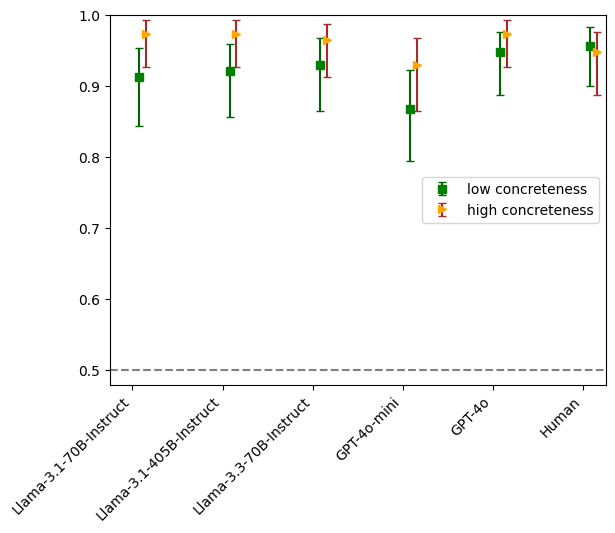

In [8]:
outputfilename = outputfolder+'/concreteness-{}'.format(modelgroup)

fig = plt.figure()
x = models[1]
y3 = resultstb['low concreteness average']
y4 = resultstb['high concreteness average']
ynames = ('low concreteness','high concreteness')
ylabels = ('low concreteness','high concreteness')

err_lower = y3 - resultstb['{} lower interval'.format(ynames[0])]
err_upper = resultstb['{} upper interval'.format(ynames[0])] - y3
yerr3 = [err_lower, err_upper]

err_lower = y4 - resultstb['{} lower interval'.format(ynames[1])]
err_upper = resultstb['{} upper interval'.format(ynames[1])] - y4
yerr4 = [err_lower, err_upper]

offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData

plt.errorbar(x, y3, yerr3, capsize=3, fmt="gs", ecolor = "darkgreen",label=ylabels[0], transform=trans+offset(5))
plt.errorbar(x, y4, yerr4, capsize=3, fmt="gs", mec = 'orange', mfc ="orange", marker=">", ecolor = "brown",label=ylabels[1], transform=trans+offset(10))
plt.axhline(y=0.5, color='grey', linestyle='--')
plt.xticks(rotation=45, ha='right')
plt.ylim((0.48, 1))
plt.legend()
plt.show
plt.savefig('{}.png'.format(outputfilename), bbox_inches='tight', dpi=dpi)

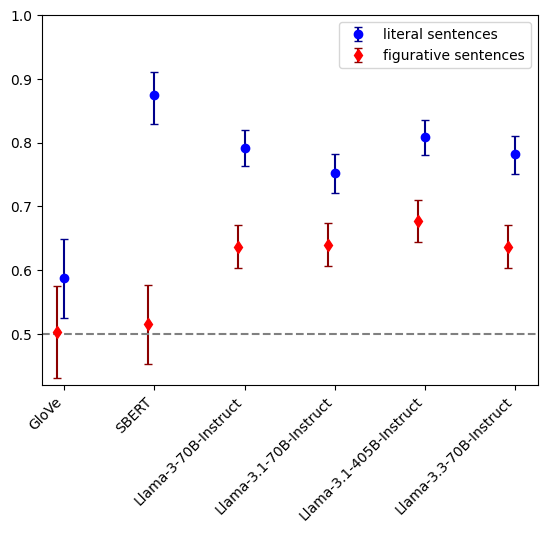

In [69]:
outputfilename = outputfolder+'/litneg_fixed-{}'.format(modelgroup)

fig = plt.figure()
x = models_litneg[1]
ynames = ('all','litneg originals')
y1 = resultstb_litneg[ynames[0]+" average"]
if include_human==True: # remove human as not applicable
    y2 = resultstb[:-1][ynames[1]+" average"]
else:
    y2 = resultstb[ynames[1]+" average"]
ylabels = ('literal sentences','figurative sentences')


err_lower = y1 - resultstb_litneg['{} lower interval'.format(ynames[0])]
err_upper = resultstb_litneg['{} upper interval'.format(ynames[0])] - y1
yerr1 = [err_lower, err_upper]

if include_human==True:
    err_lower = y2 - resultstb[:-1]['{} lower interval'.format(ynames[1])]
    err_upper = resultstb[:-1]['{} upper interval'.format(ynames[1])] - y2
    yerr2 = [err_lower, err_upper]
else:
    err_lower = y2 - resultstb['{} lower interval'.format(ynames[1])]
    err_upper = resultstb['{} upper interval'.format(ynames[1])] - y2
    yerr2 = [err_lower, err_upper]


offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData

plt.errorbar(x, y1, yerr1, capsize=3, fmt="bo", ecolor = "darkblue", label=ylabels[0])
plt.errorbar(x, y2, yerr2, capsize=3, fmt="rd", ecolor = "darkred", label=ylabels[1], transform=trans+offset(-5))
plt.axhline(y=0.5, color='grey', linestyle='--')
plt.xticks(rotation=45, ha='right')
plt.ylim((0.42, 1))
plt.legend()
plt.show
plt.savefig('{}.png'.format(outputfilename), bbox_inches='tight', dpi=dpi)

In [10]:

x = models_litneg[1]
ynames = ('intens','neg','litneg originals intens','litneg originals neg')
models_midphrases = ["Llama-3-70B-Instruct",
                    "Llama-3.1-70B-Instruct",
                    "Llama-3.1-405B-Instruct",
                    "Llama-3.3-70B-Instruct"]

x = [m+" M1" for m in models_midphrases]
resultstb = resultstb_comb.set_index("model").loc[x].reset_index()
y1 = resultstb["all average"]

C:\Users\jo16726\AppData\Local\Temp\ipykernel_13864\2952098472.py:55: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "gs" (-> marker='s'). The keyword argument will take precedence.
  plt.errorbar(x, y4, yerr4, capsize=3, fmt="gs", mec = 'orange', mfc ="orange", marker=">", ecolor = "brown",label=ylabels[3], transform=trans+offset(6))


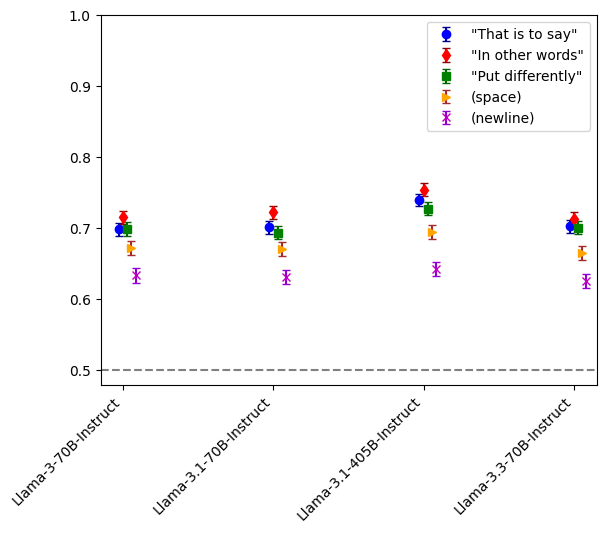

In [18]:
outputfilename = outputfolder+'/midphrases'

fig = plt.figure()
x = ["Llama-3-70B-Instruct",
                    "Llama-3.1-70B-Instruct",
                    "Llama-3.1-405B-Instruct",
                    "Llama-3.3-70B-Instruct"]

models = [m+" M1" for m in x] # set x to the models in model column
resultstb = resultstb_comb.set_index("model").loc[models].reset_index() # filter results table down to these models
y1 = resultstb["all average"] # set y to overall accuracy for these models
# set error bars
err_lower = y1 - resultstb['all lower interval'.format(ynames[0])]
err_upper = resultstb['all upper interval'.format(ynames[0])] - y1
yerr1 = [err_lower, err_upper]

models = [m+" M2" for m in x] # set x to the models in model column
resultstb = resultstb_comb.set_index("model").loc[models].reset_index() # filter results table down to these models
y2 = resultstb["all average"] # set y to overall accuracy for these models
# set error bars
err_lower = y2 - resultstb['all lower interval'.format(ynames[0])]
err_upper = resultstb['all upper interval'.format(ynames[0])] - y2
yerr2 = [err_lower, err_upper]

models = [m+" M3" for m in x]
resultstb = resultstb_comb.set_index("model").loc[models].reset_index()
y3 = resultstb["all average"]
err_lower = y3 - resultstb['all lower interval'.format(ynames[0])]
err_upper = resultstb['all upper interval'.format(ynames[0])] - y3
yerr3 = [err_lower, err_upper]

models = [m+" M4" for m in x]
resultstb = resultstb_comb.set_index("model").loc[models].reset_index()
y4 = resultstb["all average"]
err_lower = y4 - resultstb['all lower interval'.format(ynames[0])]
err_upper = resultstb['all upper interval'.format(ynames[0])] - y4
yerr4 = [err_lower, err_upper]

models = [m+" M5" for m in models_midphrases]
resultstb = resultstb_comb.set_index("model").loc[models].reset_index()
y5 = resultstb["all average"]
# set error bars
err_lower = y5 - resultstb['all lower interval'.format(ynames[0])]
err_upper = resultstb['all upper interval'.format(ynames[0])] - y5
yerr5 = [err_lower, err_upper]

ylabels = ('"That is to say"', '"In other words"', '"Put differently"', '(space)', '(newline)')

offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData

plt.errorbar(x, y1, yerr1, capsize=3, fmt="bo", ecolor = "darkblue", label=ylabels[0], transform=trans+offset(-3))
plt.errorbar(x, y2, yerr2, capsize=3, fmt="rd", ecolor = "darkred", label=ylabels[1])
plt.errorbar(x, y3, yerr3, capsize=3, fmt="gs", ecolor = "darkgreen", label=ylabels[2], transform=trans+offset(3))
plt.errorbar(x, y4, yerr4, capsize=3, fmt="gs", mec = 'orange', mfc ="orange", marker=">", ecolor = "brown",label=ylabels[3], transform=trans+offset(6))
plt.errorbar(x, y5, yerr5, capsize=3, fmt="mx", ecolor = "darkviolet",label=ylabels[4], transform=trans+offset(9))
plt.axhline(y=0.5, color='grey', linestyle='--')
plt.xticks(rotation=45, ha='right')
plt.ylim((0.48, 1))
plt.legend()
plt.show
plt.savefig('{}.png'.format(outputfilename), bbox_inches='tight', dpi=dpi)